In [10]:
from paretobench import Problem
from paretobench.plotting import history_obj_scatter

from electronsandstuff.paretobench.xopt import XoptProblemWrapper, import_cnsga_history

In [17]:
output_path = "/tmp/tmpfz6oq0ti"
prob = XoptProblemWrapper(Problem.from_line_fmt("WFG1 (n=16, k=2, m=2)"))

hist = import_cnsga_history(
    output_path,
    vocs=prob.vocs,
    problem="WFG1 (n=16, k=2, m=2)",
    errors_as_constraints=True,
)

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='f0', ylabel='f1'>)

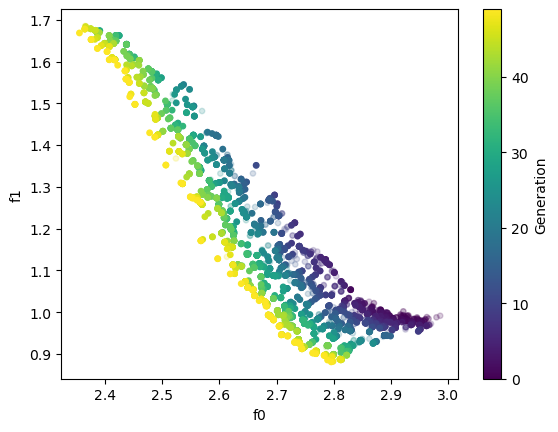

In [15]:
history_obj_scatter(hist)